# 6.2 ESA Task 6.2 Exploring relationships - Part 2 - FX-VIX-Commodities

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### FX, VIX, commodity indices, commodities

>#### 04.02 Scatterplots

>>##### FX, VIX, commodity indices, commodities

>#### 04.03 Pair Plots

>>##### FX, VIX, commodity indices, commodities

>#### 04.04 Categorical Plots

>>##### FX, VIX, commodity indices, commodities

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [14]:
# Check the dimensions
fx_vix_comm.shape

(243, 74)

In [16]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


### 03. Combine dataframe subsets for EDA

#### FX, VIX, commodity indices, commodities

In [388]:
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [412]:
# No merging needed for this dataframe, instead a subset dataframe is created for EDA
# As for the oecd_ctry subset merged dataframes created above, the first-step transformed variables are selected
fx_vix_comm_sub = fx_vix_comm[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
                              'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
                              'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12',\
                              'eur_usd_logret12', 'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12','gbp_usd_logret12',\
                              'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',\
                              'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',\
                              'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12', 'iron_ore_avg_logret12',\
                              'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [414]:
# Check the dimensions
fx_vix_comm_sub.shape

(243, 38)

In [416]:
# Check the last 3 rows
fx_vix_comm_sub.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [418]:
# Check the middle columns of the last 3 rows
fx_vix_comm_sub.iloc[240:243, 9:29]

,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [420]:
# Check the first 15 rows for expected NaNs due to the first-step transformations to an annual cycle conducted in the prior Task 6.1
fx_vix_comm_sub.head(15)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
# As for the OECD country EDA-targeted created dataframes (above), delete first 12 rows and overwrite the subset dataframe
# Need to modify a copy of the subset dataframe to avoid the warning message "A value is trying to be set on a copy of a slice from a Dataframe"
fx_vix_comm_sub_copy = fx_vix_comm_sub.copy()
fx_vix_comm_sub_copy.drop(index=range(12), inplace=True)

In [424]:
# Check the dimensions
fx_vix_comm_sub_copy.shape

(231, 38)

In [426]:
# Check the first 3 rows
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [428]:
# As for the OECD countries (above), reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_sub_copy.reset_index(drop=True, inplace=True)

In [430]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [432]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [434]:
# Export the subset dataframe as backup, before conducting EDA
# Rename the copy for brevity as 'fx_vix_comm_sub' in a pickle format
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_sub.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### FX, VIX, commodity indices, commodities

In [33]:
# Create a subset dataframe first to include only those variables of interest
sub_fx_vix_comm = fx_vix_comm_sub_copy[['aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',\
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12', 'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',\
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12', 'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',\
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12',\
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [35]:
sub_fx_vix_comm.head(3)

,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,-0.066691,0.100485,-0.074108,-0.133531,0.027940,-0.071459,-0.139762,0.000000,-0.028573,0.030158,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,-0.132060,0.064805,-0.038100,-0.167054,0.026895,-0.030583,-0.161423,0.006431,-0.014599,0.031939,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,-0.133531,0.032516,-0.028171,-0.155755,0.002453,-0.018019,-0.146930,0.012821,0.000000,0.014661,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [653]:
sub_fx_vix_comm.tail(3)

,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,0.011173,0.004112,0.011364,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,0.022473,-0.020073,0.005698,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,0.011173,-0.045619,0.045462,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


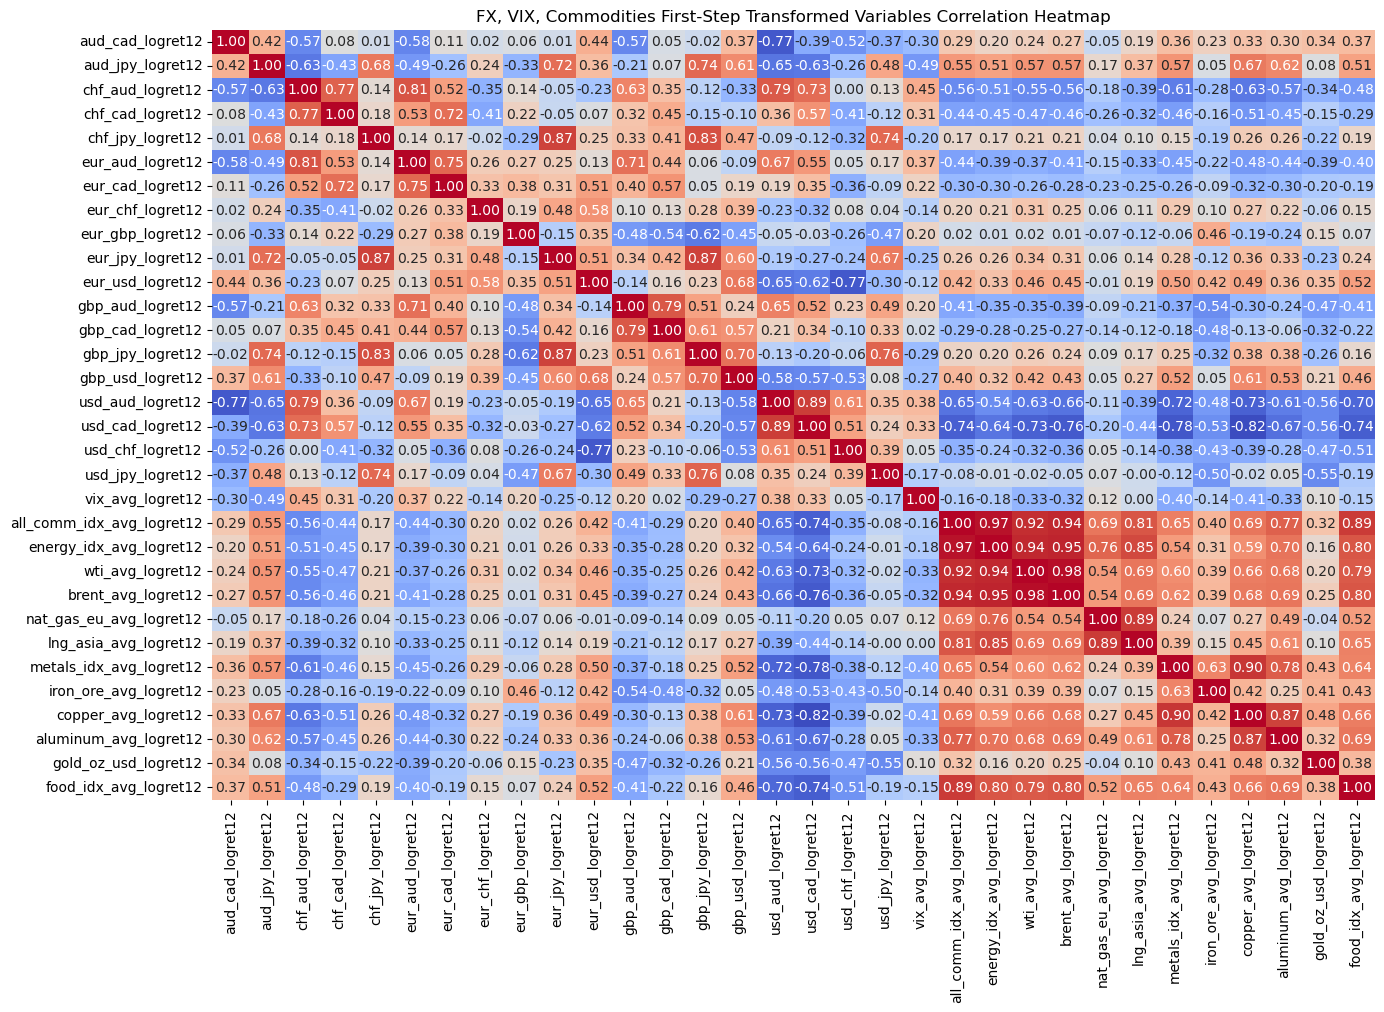

In [657]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_fx_vix_comm dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_fx_vix_comm.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("FX, VIX, Commodities First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### This will merely highlight major correlations or interesting relationships evident between major FX cross-currency rates, the VIX, commodity indices and commodities.

##### VIX had a moderate negative correlation (-0.49) with AUDJPY (Japanese Yen amount per 1 Australian Dollar), a global "risk on/risk off" barometer in FX (e.g. foreign currency) circles. This was echoed in its moderate positive correlation (+0.45) with CHFAUD (Australian Dollar amount per 1 Swiss Franc), as the Swiss Franc is the top "risk off" currency, globally speaking.  Thus, consistent, as expected for a risk sentiment gauge.

##### Note that in FX cross-rates notation, the "Currency A Symbol Currency B Symbol" notation sequentially presents the base currency first and counter currency second, and measures the quantity of the counter currency that 1 unit of the base currency buys.  Thus, GBPUSD measures the amount of USD that 1 GBP buys, for example.  USDCHF measures the amount of Swiss Francs that 1 USD buys.

##### Meanwhile, VIX had moderate negative correlations (-0.40-0.41) with the Metals index and with copper prices (copper is a constituent of the Metals index).  Disinflation or reduced demand for metals is associated with economic slowdowns, which might explain the correlation dynamic with the VIX (why the VIX would climb in that scenario), a fear gauge in the US equities market.

##### Within the commodity indices, as expected the "all commodities index" ('all_comm_idx_avg_logret12') was tracked closely by its constituent sub-indices Energy (+0.97 positive correlation), Food (+0.89) and Metals (+0.65).  Energy clearly takes center stage in the commodities-based portion of the inflation basket measurement.  The "all commodities index" had strong negative correlations (-0.65-0.74) with USDAUD and USDCAD, which makes sense insofar as Australia and Canada are prime commodities-driven economies that benefit from commodity price inflation, which has the opposite effect on the US economy, a top importer of commodities (along with China).

##### Brent crude oil similarly had strong negative correlations (-0.66-0.76) with USDAUD and USDCAD.  Although the three (3) currencies belong to countries that export crude oil (Brent, WTI e.g. "West Texas Intermediate" or other type of crude oil), the relative correlation picture suggests that Australia and Canada benefit more from crude oil price inflation than the US does.

##### The Metals index found its strongest negative correlations (-0.72-0.78) with USDAUD and USDCAD, echoing the Brent crude oil pricing dynamic with these cross-currency pairs.

##### Gold price log returns (annual) had moderate-strong negative correlations (-0.56, matching) with USDAUD and USDCAD, echoing but not as strong as the Brent crude oil and Metals index correlation relationships with those FX pairs.  It had a similar dynamic (-0.55 negative correlation) with USDJPY. Gold historically has been considered a "safe haven" asset class in times of crisis, stress and/or volatility.  The correlation picture here, if it is not a spurious correlation, points to a global preference for gold over the USD in such times.  Unexpectedly, gold prices had almost no correlation with either the risk sentiment barometer AUDJPY (+0.08 correlation) or the US equities market fear gauge, the VIX (+0.10 correlation). It may be that at least in the former case, Australia's position as a major gold producer benefits more from gold price inflation than the "risk off" sentiment associated with gold price appreciation.

##### The Food index, critical to tracking basic survival needs across geographies for the world's population, found its strongest negative correlations (-0.70-0.74) with USDAUD and USDCAD.  Despite large agricultural exports, the United States is still a net importer of food, while for Australia it's only for some agriculture commodities, and Canada is a net exporter in this arena.

##### The preliminary takeaways or theme from the commodities correlation heatmap is that AUD and CAD "like" but USD "dislikes" commodities price inflation.  For other major currencies the magnitude of their correlation relationships with commodities prices are less polarized.

##### Within the FX cross-currency pairs complex, USDCAD versus USDAUD has the strongest positive correlation (+0.89) of all pairs.  GBPJPY versus EURJPY, and EURJPY versus CHFJPY, have the 2nd strongest positive correlation (+0.87).  Other very strong positive correlations include GBPJPY versus CHFJPY (+0.83), EURAUD versus CHFAUD (+0.81), USDAUD versus CHFAUD (+0.79) and GBPAUD versus GBPCAD (+0.79).

##### The preliminary takeaways or theme from the FX cross-currency pairs complex correlations, are that EUR, CHF and GBP respond to other major currencies similarly, which may reflect their spatial circumstance (e.g. proximity).  AUD and CAD, reflecting commodities-driven economies and the "risk on" side of the global sentiment equation, follow each other and are interchangeable to some degree.  When the JPY is weak (or less frequently, strong), it tends to be so against all major currencies rather than just a few.  The USD can show mixed behavior, it can be strong against JPY while simultaneously weak against other major currencies.  Generally speaking, CHF, JPY and USD are considered the top 3 (in descending order) safe haven ("risk off") currencies, while AUD and CAD (to a lesser degree than AUD) are seen as go-to speculation ("risk on") currencies.  Within this risk spectrum, EUR and GBP are somewhere in the middle.

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

#### FX, VIX, commodity indices, commodities

In [829]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_fx_vix_comm.columns

Index(['aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12',
       'chf_cad_logret12', 'chf_jpy_logret12', 'eur_aud_logret12',
       'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12',
       'eur_jpy_logret12', 'eur_usd_logret12', 'gbp_aud_logret12',
       'gbp_cad_logret12', 'gbp_jpy_logret12', 'gbp_usd_logret12',
       'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12',
       'usd_jpy_logret12', 'vix_avg_logret12', 'all_comm_idx_avg_logret12',
       'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',
       'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12',
       'metals_idx_avg_logret12', 'iron_ore_avg_logret12',
       'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12',
       'food_idx_avg_logret12'],
      dtype='object')

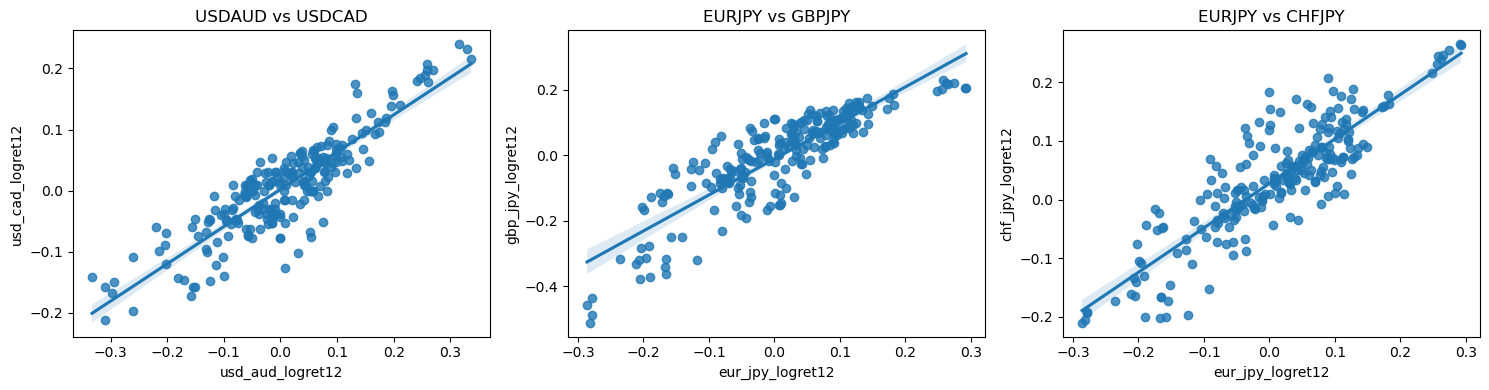

In [831]:
# Three scatterplots highlighting strong correlations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='usd_aud_logret12', y='usd_cad_logret12', data=sub_fx_vix_comm, ax=axes[0])
axes[0].set_title('USDAUD vs USDCAD')
sns.regplot(x='eur_jpy_logret12', y='gbp_jpy_logret12', data=sub_fx_vix_comm, ax=axes[1])
axes[1].set_title('EURJPY vs GBPJPY')
sns.regplot(x='eur_jpy_logret12', y='chf_jpy_logret12', data=sub_fx_vix_comm, ax=axes[2])
axes[2].set_title('EURJPY vs CHFJPY')
plt.tight_layout()
plt.show()

### These scatterplots all show variables with good linear relationships.  The AUD (Australian Dollar) and CAD (Canadian Dollar), representing similar commodities-rich export economies, are almost interchangeable in their relationship with other major currencies.  In the left-hand plot, the AUD and CAD respective relationships with the USD track pretty closely.  The relatively tight variance is all the more remarkable when we consider the five (5) major and moderate exogenous economic shocks that have hit the world economy in the last 20 years. Another theme in FX-land is the tendency of the JPY to experience uniform behavior (with slight variations in magnitude) against other major currencies.  This contrasts with the USD, which can be simultaneously weak against some currencies yet strong against others. The EUR, GBP and CHF all move similarly against the JPY, as per the middle and right-hand plots, which show strong linear relationships with relatively modest variance through past economic crises.

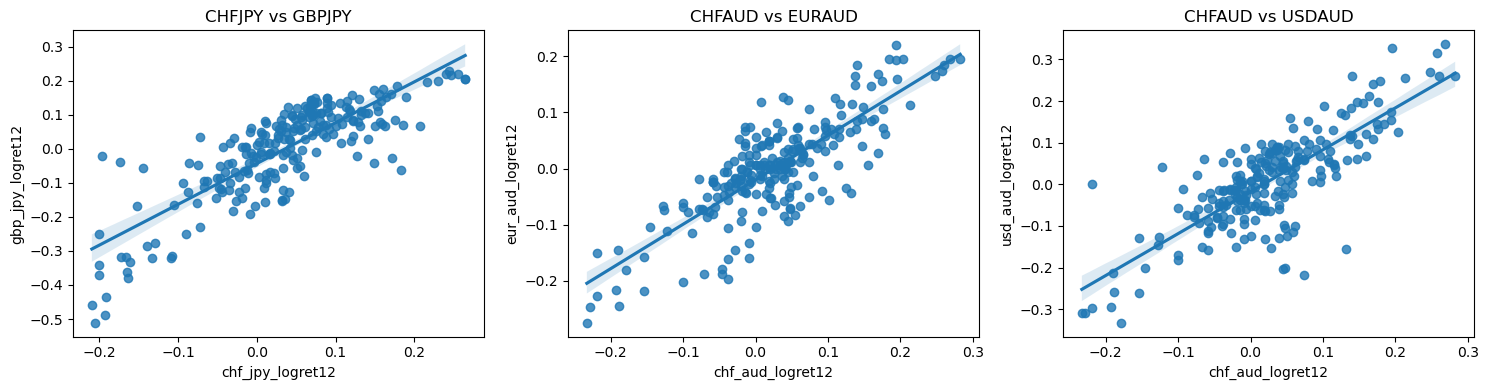

In [834]:
# More scatterplots highlighting strong correlations in FX-land
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='chf_jpy_logret12', y='gbp_jpy_logret12', data=sub_fx_vix_comm, ax=axes[0])
axes[0].set_title('CHFJPY vs GBPJPY')
sns.regplot(x='chf_aud_logret12', y='eur_aud_logret12', data=sub_fx_vix_comm, ax=axes[1])
axes[1].set_title('CHFAUD vs EURAUD')
sns.regplot(x='chf_aud_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[2])
axes[2].set_title('CHFAUD vs USDAUD')
plt.tight_layout()
plt.show()

### Aside from major currencies moving similarly against the JPY, this "uniformly together" tendency also exists relative to the AUD (and its proxy, the CAD), except for AUDJPY, which as the global "risk on/risk off" sentiment barometer will move independently of other FX cross-rates, particularly during crisis periods.

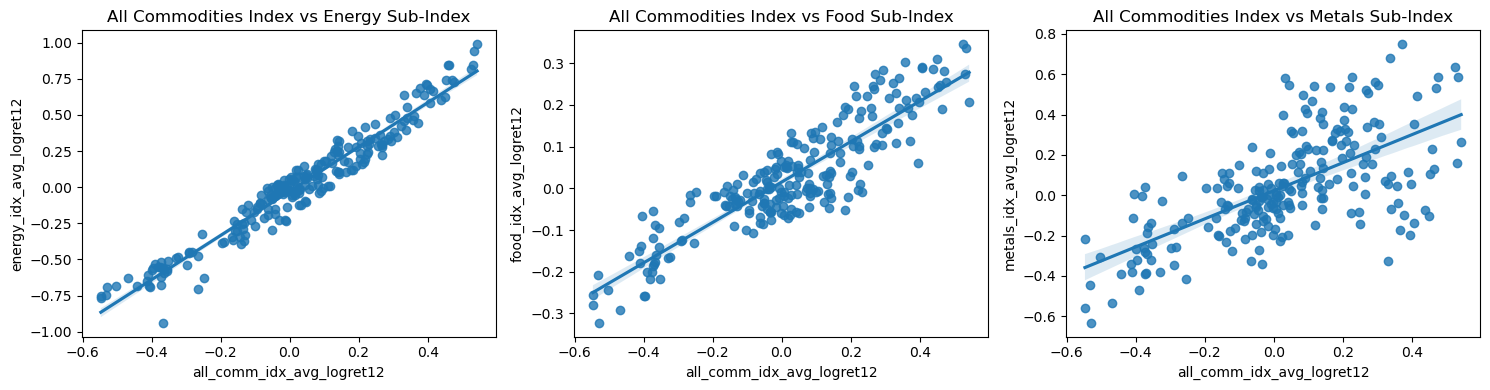

In [838]:
# Three scatterplots to show the correlation of the "all commodities" index to its principal constituent sub-indices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='all_comm_idx_avg_logret12', y='energy_idx_avg_logret12', data=sub_fx_vix_comm, ax=axes[0])
axes[0].set_title('All Commodities Index vs Energy Sub-Index')
sns.regplot(x='all_comm_idx_avg_logret12', y='food_idx_avg_logret12', data=sub_fx_vix_comm, ax=axes[1])
axes[1].set_title('All Commodities Index vs Food Sub-Index')
sns.regplot(x='all_comm_idx_avg_logret12', y='metals_idx_avg_logret12', data=sub_fx_vix_comm, ax=axes[2])
axes[2].set_title('All Commodities Index vs Metals Sub-Index')
plt.tight_layout()
plt.show()

### The energy sub-index (left-side plot) has the strongest positive correlation with (and impact on) the all-commodities index, followed by the food and metals sub-indices, which have looser linear fits with the all-commodities index. The "all-commodities" is a useful general index to track commodities-related inflation and disinflation.

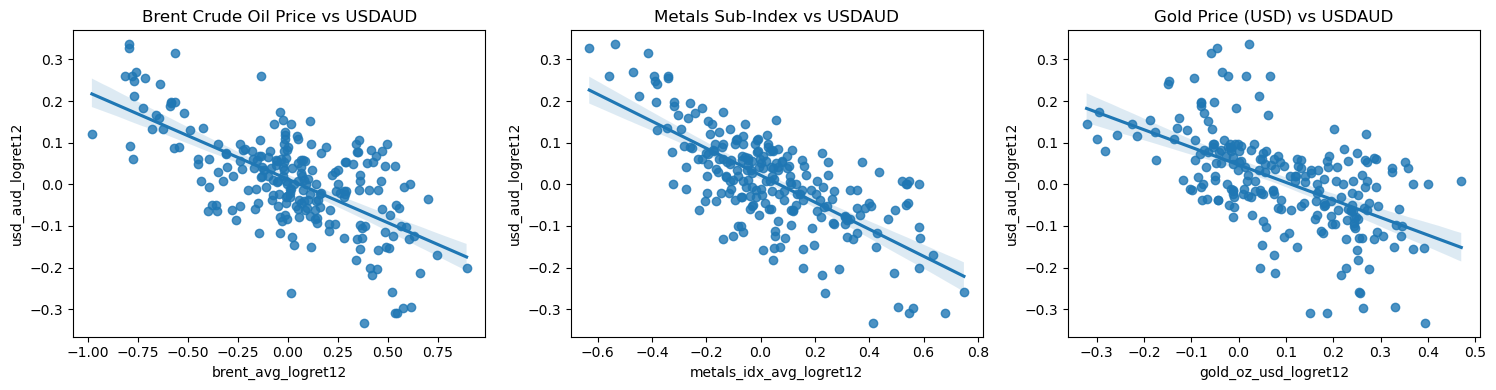

In [846]:
# Three scatterplots tracking one commodity sub-index and two individual commodities' impact on USDAUD
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='brent_avg_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[0])
axes[0].set_title('Brent Crude Oil Price vs USDAUD')
sns.regplot(x='metals_idx_avg_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[1])
axes[1].set_title('Metals Sub-Index vs USDAUD')
sns.regplot(x='gold_oz_usd_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[2])
axes[2].set_title('Gold Price (USD) vs USDAUD')
plt.tight_layout()
plt.show()

### AUD clearly benefits from Brent crude oil, Metals sub-index and Gold price appreciation, and moves the opposite direction when these decline.

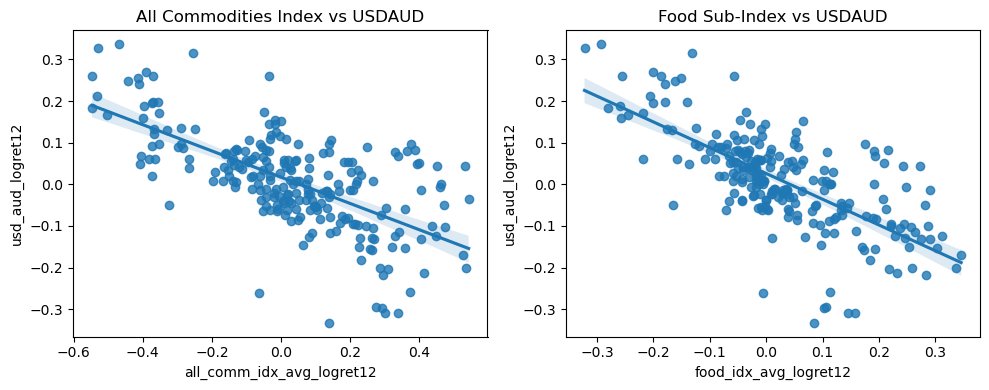

In [849]:
# Two more scatterplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(x='all_comm_idx_avg_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[0])
axes[0].set_title('All Commodities Index vs USDAUD')
sns.regplot(x='food_idx_avg_logret12', y='usd_aud_logret12', data=sub_fx_vix_comm, ax=axes[1])
axes[1].set_title('Food Sub-Index vs USDAUD')
plt.tight_layout()
plt.show()

### The all-commodities index and food sub-index follow the prior three plots' commodities relationships with USDAUD.  The AUD clearly benefits from commodity price inflation.

### 04.03 Pair Plots

### FX, VIX, commodity indices, commodities

In [51]:
# Check variables for candidate pair plots based on prior scatterplots
sub_fx_vix_comm.columns

Index(['aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12',
       'chf_cad_logret12', 'chf_jpy_logret12', 'eur_aud_logret12',
       'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12',
       'eur_jpy_logret12', 'eur_usd_logret12', 'gbp_aud_logret12',
       'gbp_cad_logret12', 'gbp_jpy_logret12', 'gbp_usd_logret12',
       'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12',
       'usd_jpy_logret12', 'vix_avg_logret12', 'all_comm_idx_avg_logret12',
       'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',
       'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12',
       'metals_idx_avg_logret12', 'iron_ore_avg_logret12',
       'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12',
       'food_idx_avg_logret12'],
      dtype='object')

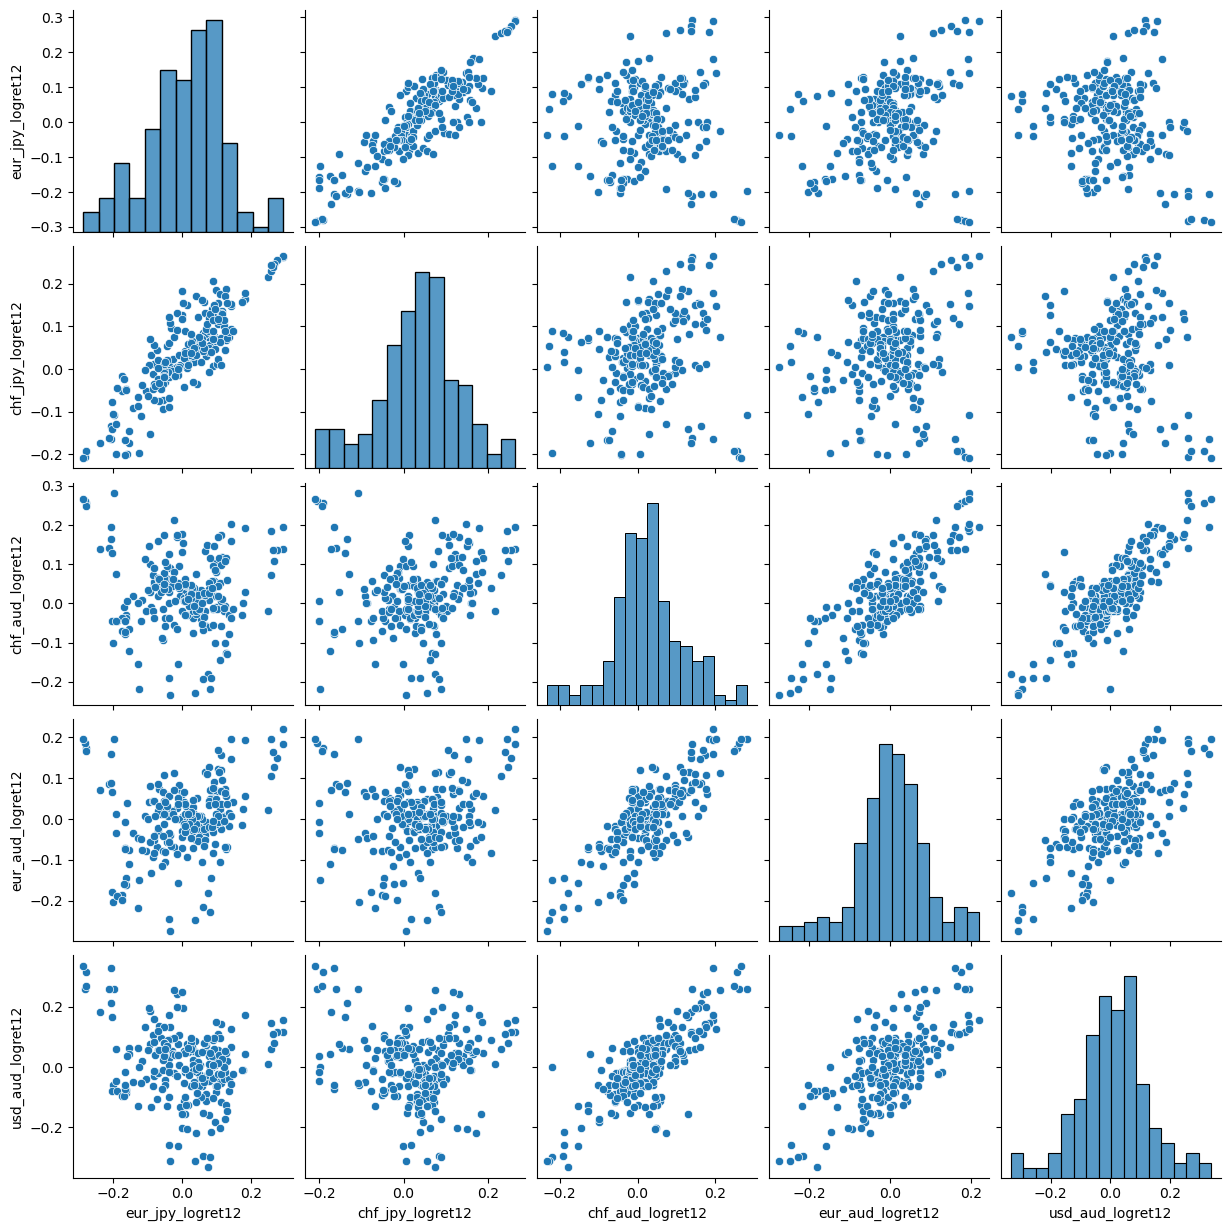

In [53]:
# Create a pair plot matrix
sub_fx_vix_comm_1 = sub_fx_vix_comm[['eur_jpy_logret12', 'chf_jpy_logret12', 'chf_aud_logret12', 'eur_aud_logret12', 'usd_aud_logret12']]
p_sub_fx_vix_comm_1 = sns.pairplot(sub_fx_vix_comm_1)

#### The variables have an approximate Normal frequency distribution. Further exploration: (1) EURJPY (Japanese Yen amount per 1 EUR) vs CHFJPY (Japanese Yen amount per 1 Swiss Franc) to confirm the tendency of JPY to have a similar relationship with different major currencies (except AUDJPY or CADJPY, which have their own behavior as global risk sentiment barometers), as the scatterplot showing a positive correlation with tight variance confirms for these two variables; (2) CHFAUD (Australian Dollar amount per 1 Swiss Franc) vs EURAUD (Australian Dollar amount per 1 Euro Dollar), to also highlight the tendency of major currencies to have a similar relationship with respect to AUD (a "risk on", speculative currency that benefits from inflationary commodity price moves), as the scatterplot showing a positive correlation with tight variance demonstrates; and (3) CHFAUD vs USDAUD (Australian Dollar amount per 1 USD), which further underscores the observation made in point #2, where the scatterplot shows a positive correlation between the variables, with a few more outliers.

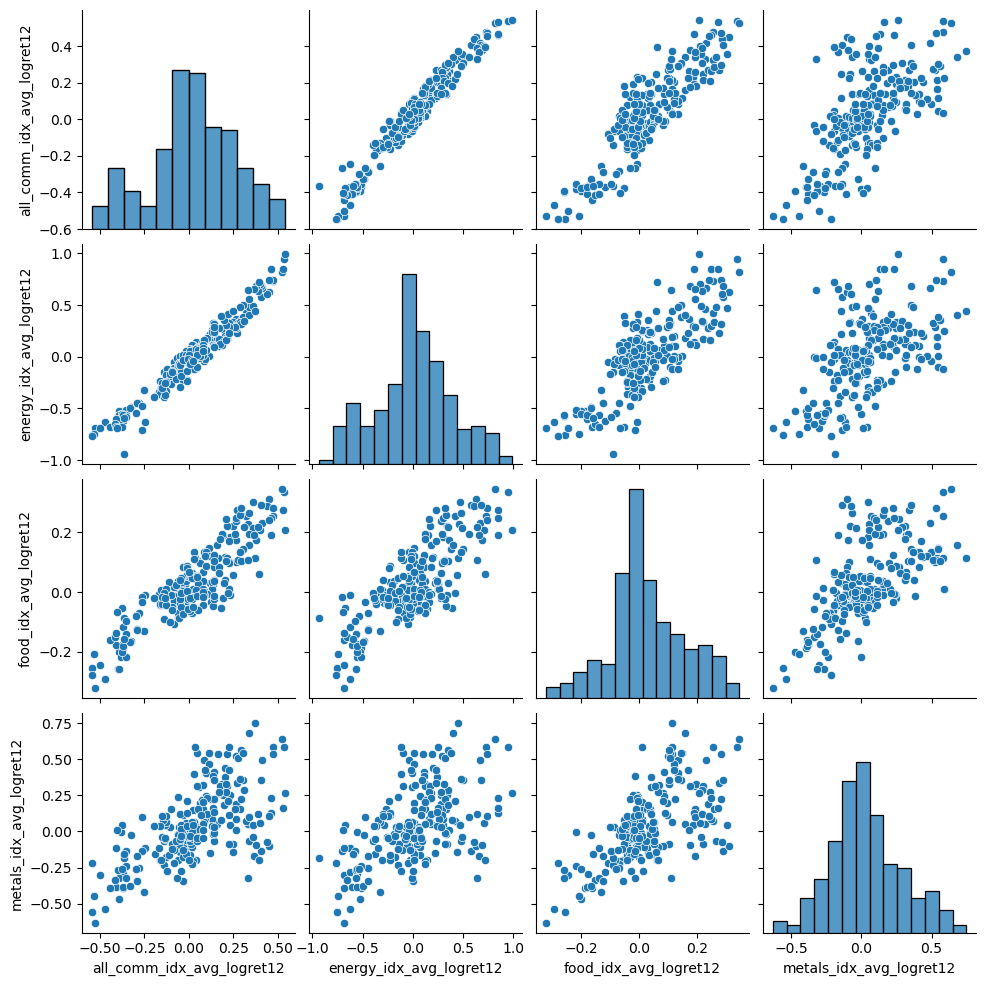

In [55]:
# Create another pair plot matrix
sub_fx_vix_comm_2 = sub_fx_vix_comm[['all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'food_idx_avg_logret12', 'metals_idx_avg_logret12']]
p_sub_fx_vix_comm_2 = sns.pairplot(sub_fx_vix_comm_2)

#### The variables have relatively Normal frequency distributions, with 'all_comm_idx_avg' and 'energy_idx_avg' showing a slight bump on the left side and 'food_idx_avg' slightly asymmetrical. Further exploration: (1) All-Commodities index vs Energy sub-index, simply to show how impactful energy prices are to general commodities inflation, as the scatterplot's strong positive correlation with minimal variance demonstrates; (2) All-Commodities index vs Food sub-index, to show a similar dynamic as in point #1, subject to greater variance; and (3) All-Commodities index vs Metals sub-index, continuing the theme of points #1 and #2, but showing even greater variance.  Thus if one had only one commodities sub-index available to best predict overall commodities inflation, disinflation (e.g. deceleration of the inflation rate) or deflation, Energy would be the clear winner.

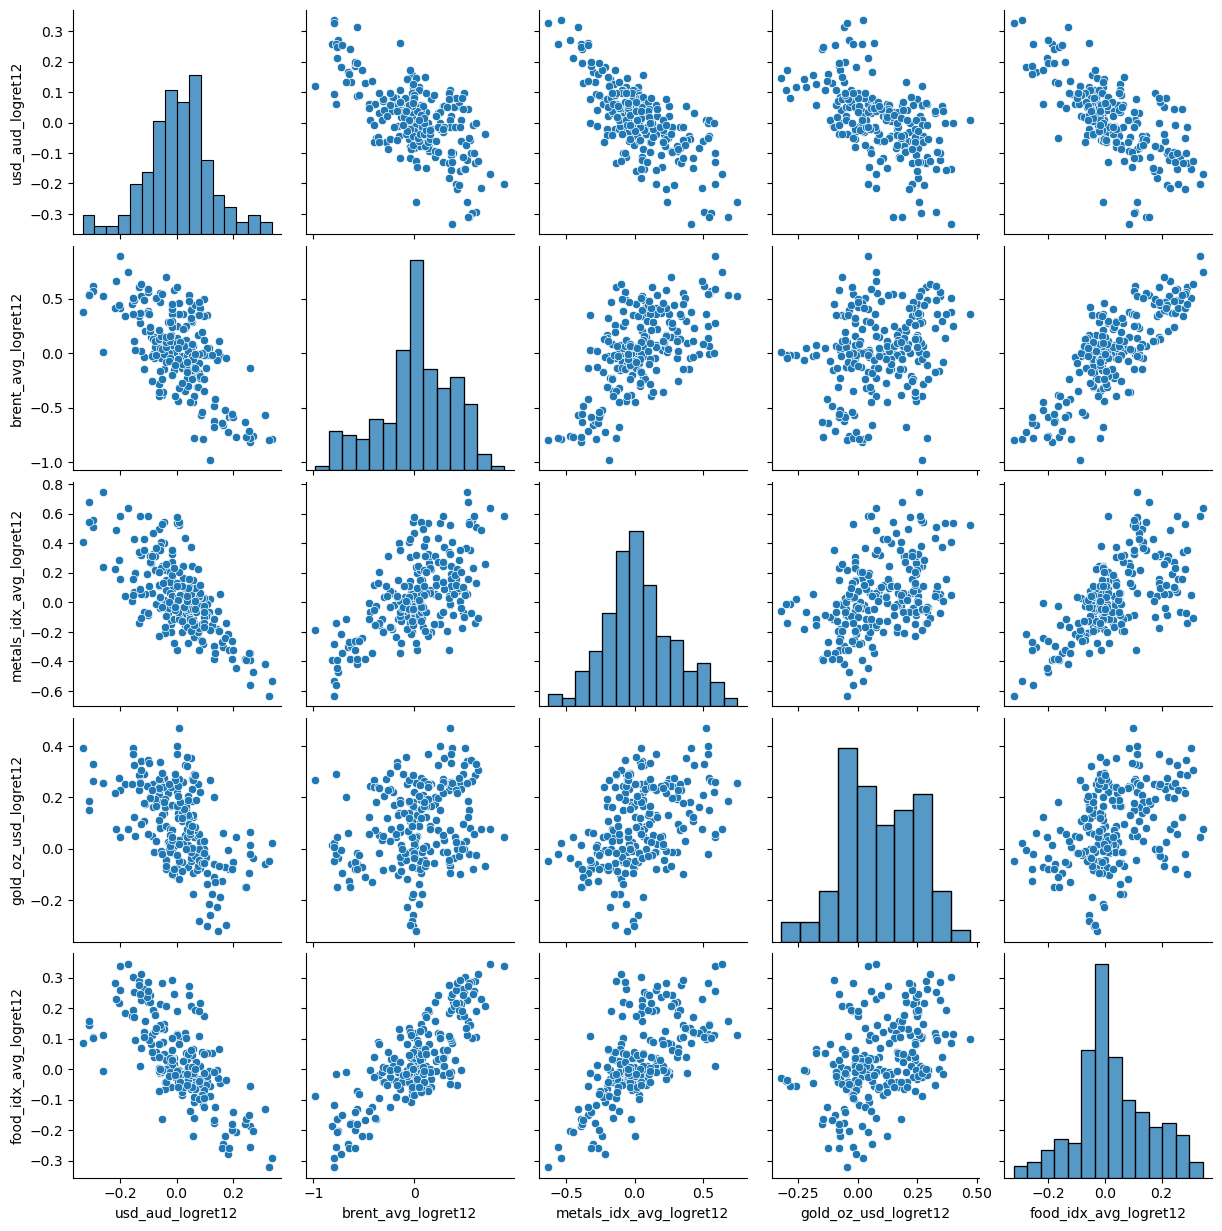

In [57]:
# Create another pair plot matrix
sub_fx_vix_comm_3 = sub_fx_vix_comm[['usd_aud_logret12', 'brent_avg_logret12', 'metals_idx_avg_logret12', 'gold_oz_usd_logret12',\
                                     'food_idx_avg_logret12']]
p_sub_fx_vix_comm_3 = sns.pairplot(sub_fx_vix_comm_3)

#### The variables have mostly Normal frequency distributions, with modest asymmetry. Further exploration: (1) USDAUD (Australian Dollar per 1 USD) vs Brent crude oil price, to assess whether Australia or the US has a stronger relationship with (exposure to) oil prices (note that oil prices in different hemispheres track each other closely, thus are interchangeable for correlation analysis purposes), where the scatterplot above reveals a negative correlation (the US, along with China, is a very large consumer of oil, thus oil price hikes act as a net "tax" on the economy, hurting consumers); (2) USDAUD vs Metals sub-index, because Australia is a large metals producer and exporter, and as expected the scatterplot shows a clear negative correlation with modest variance; (3) USDAUD with Gold, because Australia is a major gold producer and exporter, again the scatterplot shows a negative correlation between the two variables (incidentally, gold is one of the constituents of the Metals sub-index); and (4) USDAUD vs Food sub-index, since food is essential to human survival and thus a key variable to assess, where the scatterplot above underscores a negative correlation, with some weak USD outliers.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### FX, VIX, commodity indices, commodities

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'fx_vix_comm_sub_copy' subset dataframe, in order to overlay this categorical variable on scatterplots and histograms.

In [150]:
fx_vix_comm_sub_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [152]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12,shock_name
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664,No Shock
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714,No Shock
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650,No Shock


In [154]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12,shock_name
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646,Rus_Ukr_War & BOJ Pivot


In [156]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12', 'shock_name'],
      dtype='object')

#### Create an FX, VIX, Commodity Indices & Commodities scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs. Save and export the grid visualization.

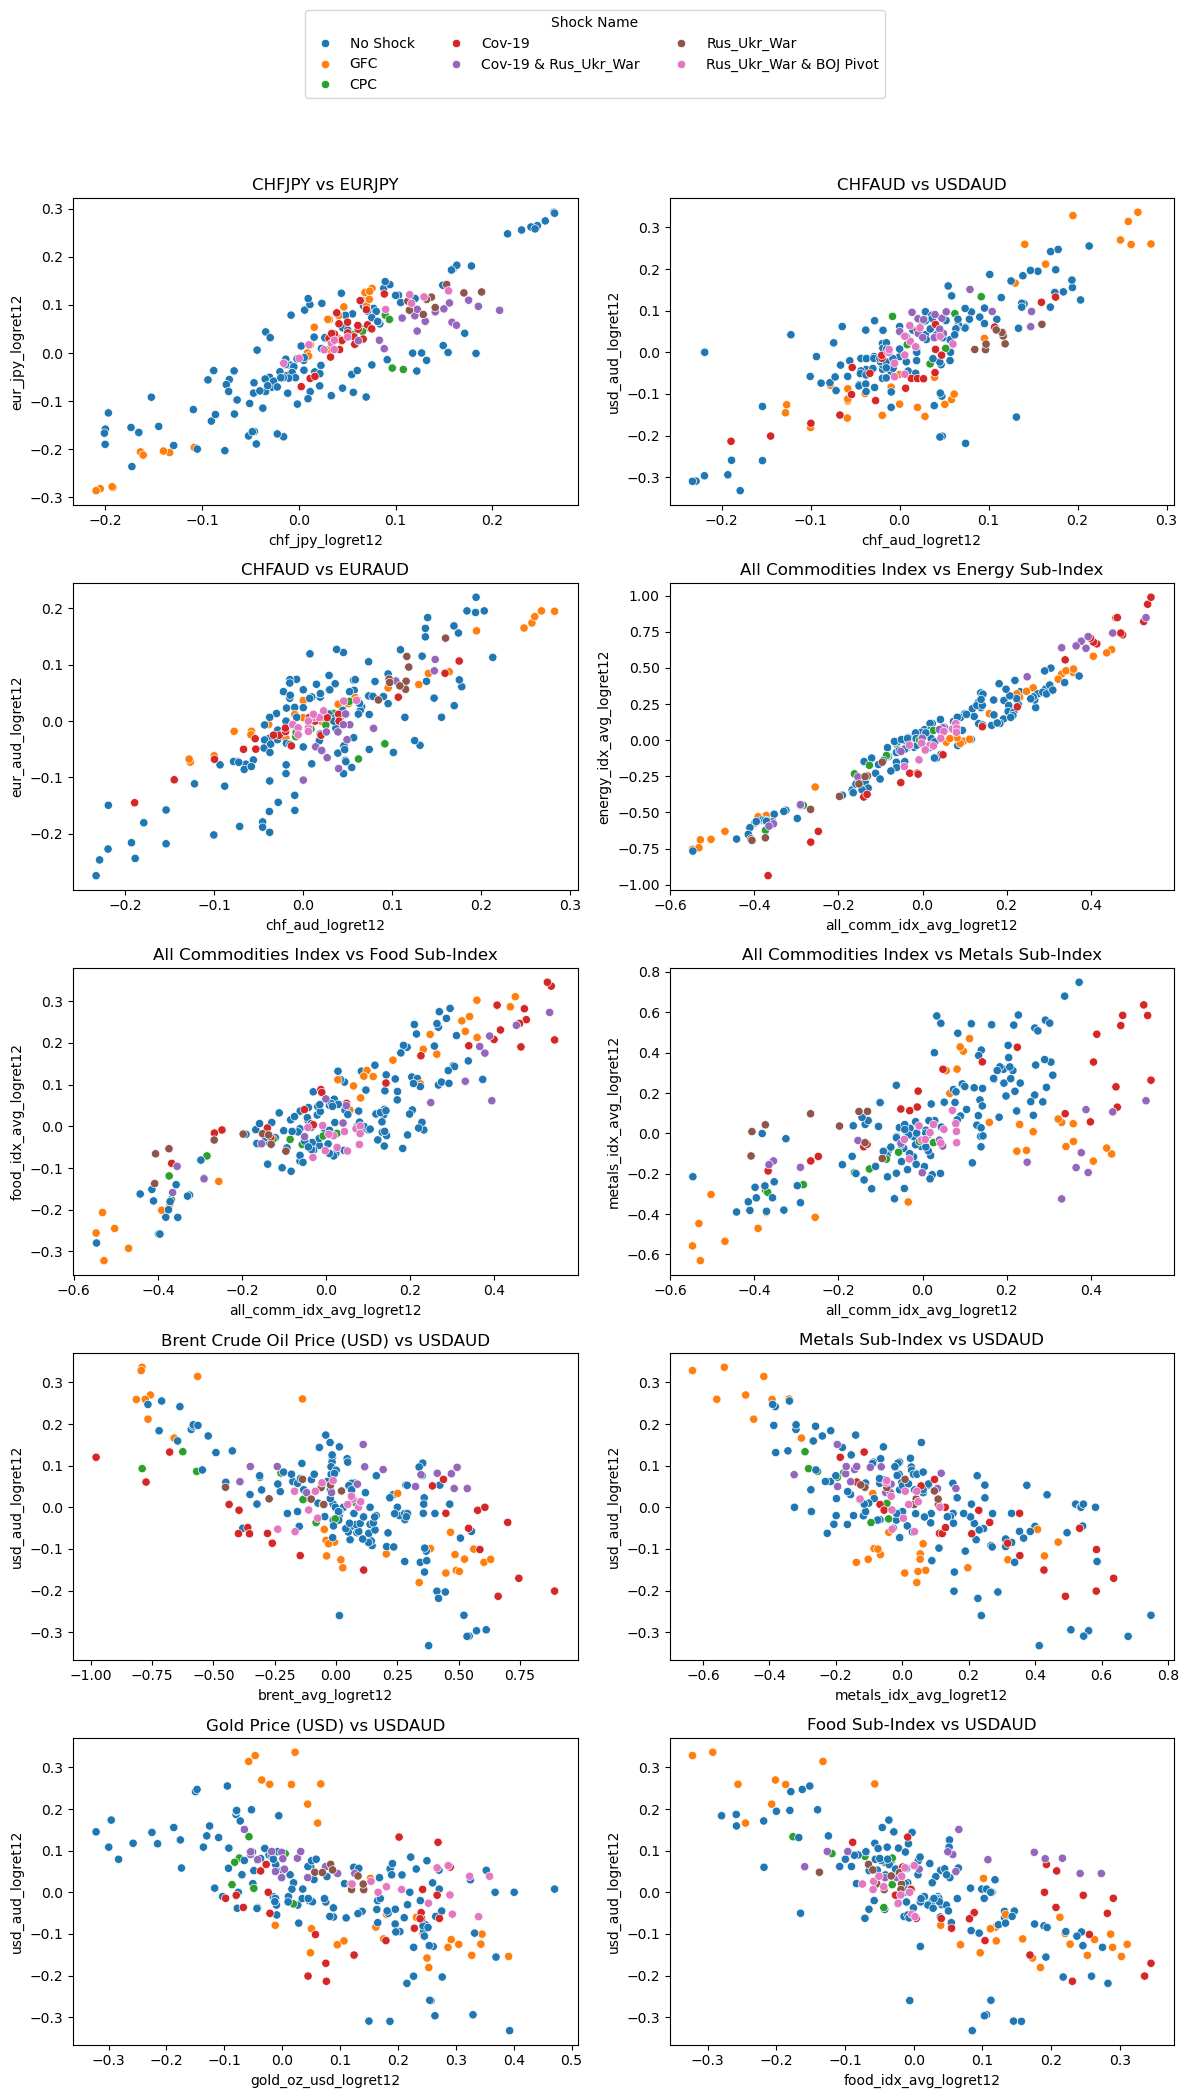

In [161]:
# Create a 5 x 2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
plot_kwargs = dict(data=fx_vix_comm_sub_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='chf_jpy_logret12', y='eur_jpy_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('CHFJPY vs EURJPY')

sns.scatterplot(x='chf_aud_logret12', y='usd_aud_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('CHFAUD vs USDAUD')

sns.scatterplot(x='chf_aud_logret12', y='eur_aud_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('CHFAUD vs EURAUD')

sns.scatterplot(x='all_comm_idx_avg_logret12', y='energy_idx_avg_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('All Commodities Index vs Energy Sub-Index')

sns.scatterplot(x='all_comm_idx_avg_logret12', y='food_idx_avg_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('All Commodities Index vs Food Sub-Index')

sns.scatterplot(x='all_comm_idx_avg_logret12', y='metals_idx_avg_logret12', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('All Commodities Index vs Metals Sub-Index')

sns.scatterplot(x='brent_avg_logret12', y='usd_aud_logret12', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('Brent Crude Oil Price (USD) vs USDAUD')

sns.scatterplot(x='metals_idx_avg_logret12', y='usd_aud_logret12', ax=axes[3, 1], **plot_kwargs)
axes[3, 1].set_title('Metals Sub-Index vs USDAUD')

sns.scatterplot(x='gold_oz_usd_logret12', y='usd_aud_logret12', ax=axes[4, 0], **plot_kwargs)
axes[4, 0].set_title('Gold Price (USD) vs USDAUD')

sns.scatterplot(x='food_idx_avg_logret12', y='usd_aud_logret12', ax=axes[4, 1], **plot_kwargs)
axes[4, 1].set_title('Food Sub-Index vs USDAUD')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='eur_jpy_logret12', y='chf_jpy_logret12', hue='shock_name', data=fx_vix_comm_sub_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'fx_vix_comm_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### Cross-currency pairs correlated against each other, when there was one currency in common, generally had less variance than other variable matchups. Shock periods visually produced less variance than normal periods for the three particular combinations above. Of minor interest are the outliers in the CHFAUD vs USDAUD scatterplot, which occurred during normal ("No Shock") periods, a bit odd.  In the three commodities sub-index scatterplots against the parent "all commodities" benchmark index, shock periods caused only minor (3 months of Cov-19 for Energy; GFC, Cov-19, & Cov-19/Rus-Ukr-War for Metals) variance increases. The USDAUD scatterplots against different commodities and commodity sub-indices underscore the fact that AUD benefits strongly from commodity price inflation, and suffers the opposite during deflationary cycles.  In the last four scatterplots, visually it appears again that shock periods produced less variance than normal periods.  It is not immediately clear why normal ("No Shock") periods might produce greater variance, and outliers, than shock periods for some of the scatterplot variables above, other than acknowledging that many supply/demand factors influence the price of assets and currency pairs regardless of the macro risk environment.

#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the stacked bar histograms grid visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\fx_vix_comm_hist_pre_stat.png


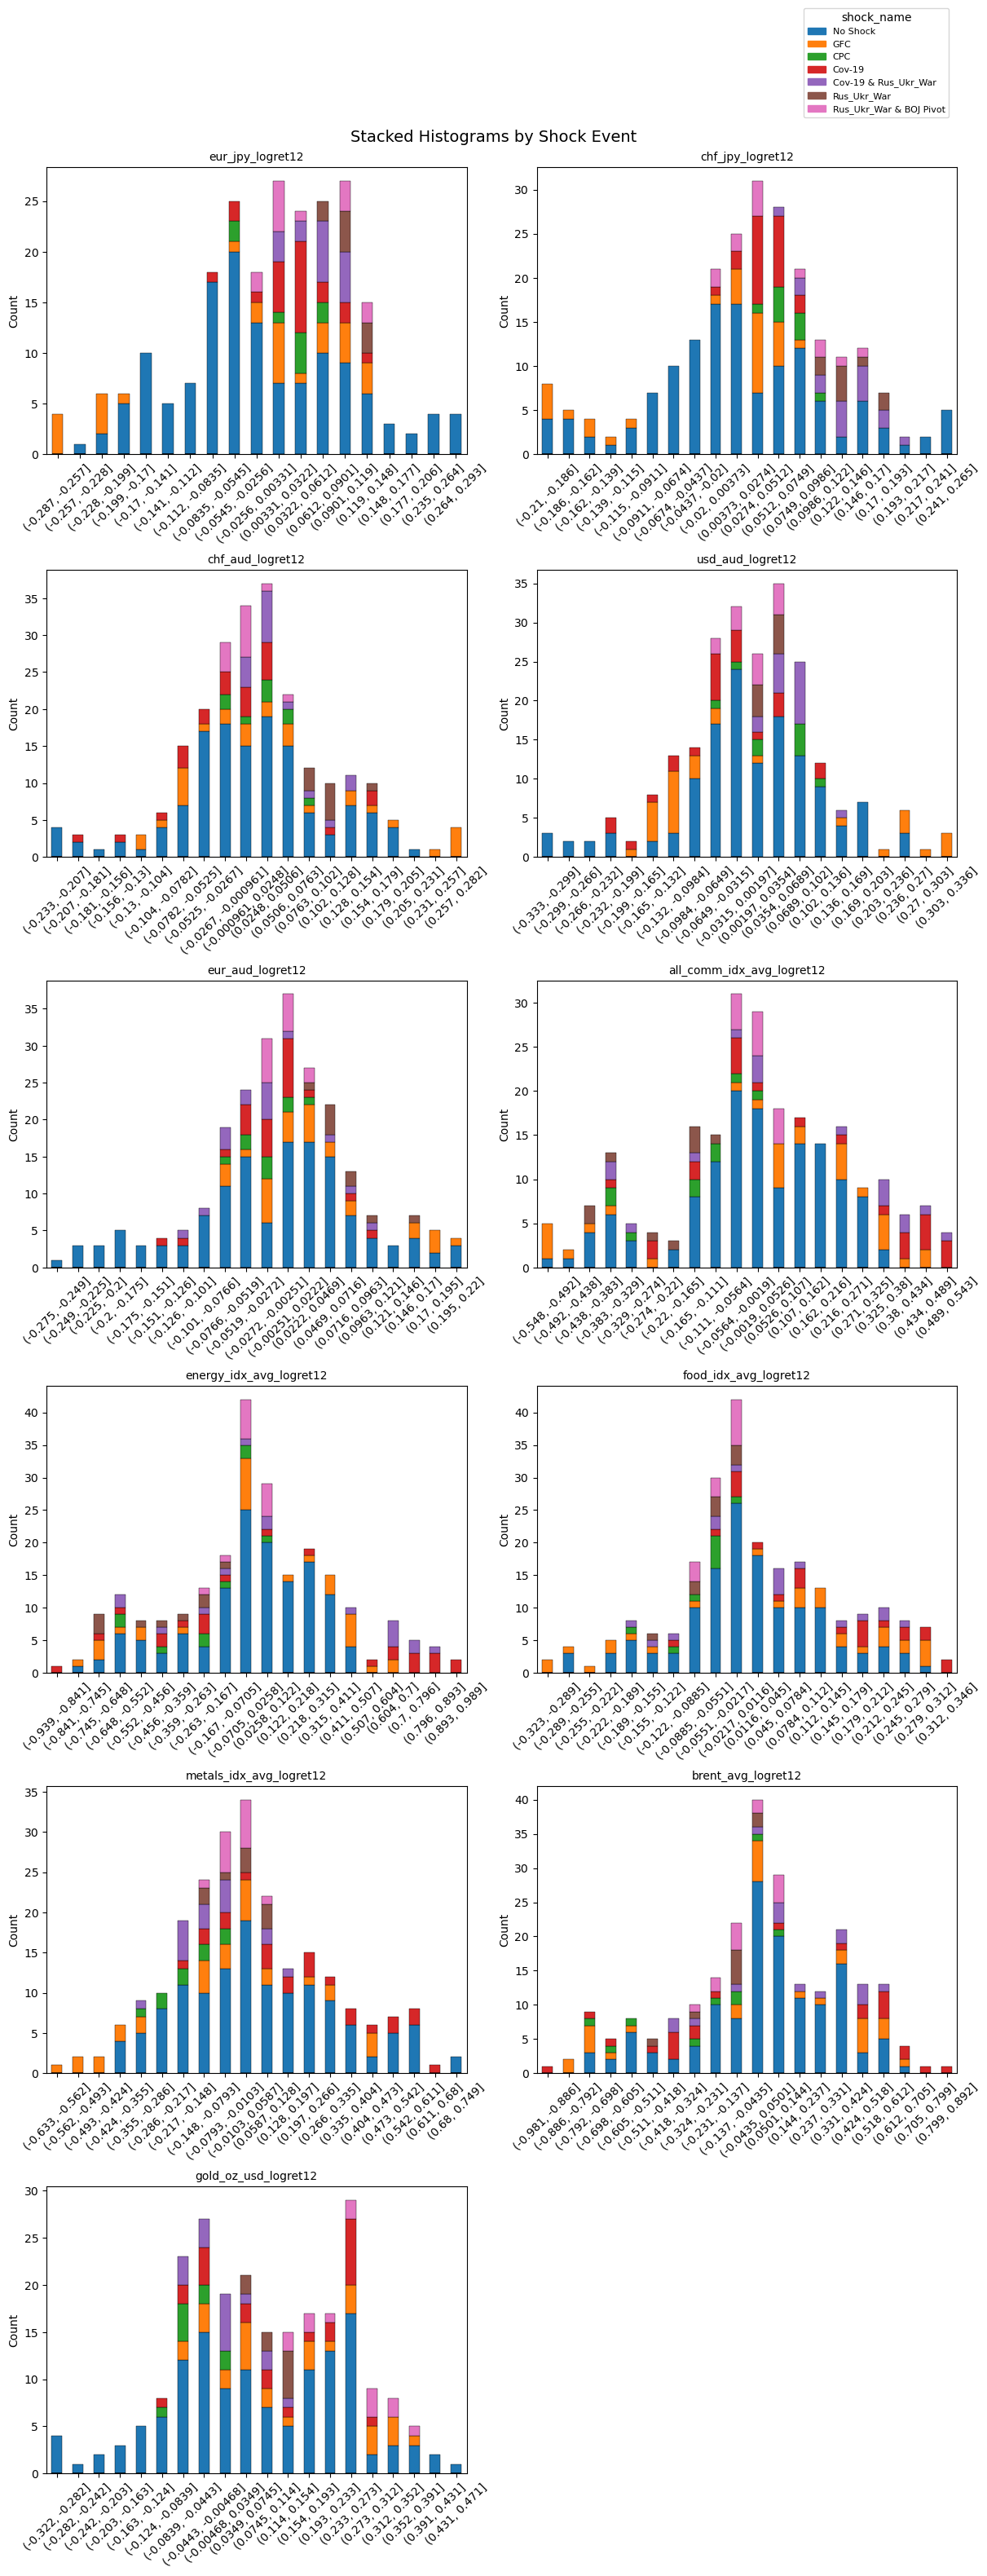

In [169]:
fx_vix_comm_scat_vars = ['eur_jpy_logret12', 'chf_jpy_logret12', 'chf_aud_logret12', 'usd_aud_logret12', 'eur_aud_logret12', \
                         'all_comm_idx_avg_logret12','energy_idx_avg_logret12','food_idx_avg_logret12', 'metals_idx_avg_logret12',\
                         'brent_avg_logret12', 'gold_oz_usd_logret12']

shockstack_grid(df=fx_vix_comm_sub_copy, vars_to_plot=fx_vix_comm_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='fx_vix_comm_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### As expected, shock periods did impact the tails of commodity index and commodity price frequency distributions, with the exception of gold which appears shock-indifferent. The CPC (2014 Commodity Price Collapse, green bars) impact is apparent on the left side of commodity index and individual commodity distributions, but this "crisis" ( ... if you believe deflation is problematic ... ) was a minor and relatively short-lived shock.  For the FX cross-currency pairs, shock periods had less impact on frequency distribution tails, with only minor impact from the GFC (Global Financial Crisis). As with the country-level stacked bar histograms for other variables, there is direct evidence of mean reversion type pendulum swings of price changes during shock periods, or as overlapping shock periods "hand off" to the next shock.  The tail end of Cov-19 overlapped temporally with the early part of the Russia-Ukraine War, while the latter now overlaps with the Bank of Japan Interest Rate Pivot that began last year.

In [172]:
# Export the FX, VIX, commodity indices & commodities subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_cat_pre_stat.pkl'))